# **PROJECT PHASE 2**

## Revenue Prediction in Online Advertising 




The main intention of this project is revenue prediction on Google's own online advertising platform. The problem at hand is to predict a revenue-related metric for each website traffic record using Google platform dataset. The data sets were sourced from the Kaggle Machine Learning Repository at [https://www.kaggle.com/c/machine-learning-battle-mlmath2319/data](https://www.kaggle.com/c/machine-learning-battle-mlmath2319/data) [1] which is posted as part of Machine Learning Battle -MATH2319. This machine learning analysis project consist of two stages. Phase 1 includes Detailed descriptive statistical analysis of the data using charts, graphs, interactions, etc as appropriate and data pre-processing by dealing with missing values, outliers, data transformation, data aggregation on the Google advertising dataset. The second phase  include applications of suitable  machine learning techniques

This report is divided into 7 parts according to the tasks performed from the initial analysis to the clean dataset preparation. Section 2 explains about the main objective and the description of the data source feature variables and target variables. Section 3 covers data preparation and appropriate tools for data wrangling for continuous and categorical features. Section 4 is focused on hyper parameter tuning. It also analyses attributes which are more suitable for model selection and their impact on the target variable .Section 5 compares the performance of all the modelling algorithms and their outcomes. Section 6 is focused on the limitations of the dataset and the modelling techniques. The last part presents a brief summary. This report is compiled from Google colab Jupyter Notebook and includes both narratives and the Python codes used for data loading, analysing ,pre-processing, cleansing ,visualisation, model selection, model validation, comparison and prediction .


# Overview

## Methodology

Regression algorithms are machine learning techniques for predicting continuous numerical values. They are supervised learning tasks and they require labelled training examples.

Below are the most common algorithms for predicting a numerical value. Revenue prediction on googles platform deals with continuous variables as target. We can use regression algorithms to predict the revenue values more accurately using the below machine learning models.

1.	Linear Regression
2.	Decision Trees
3.	Neural Networks



Our modelling strategy begins by transforming the full dataset cleaned from Phase I. This transformation includes encoding categorical descriptive features as numerical and then scaling of the descriptive features. As per the project specification, the training data contains about 215K records and the test data contains about 31K records. Training dataset is used for the modelling the algorithm .After fitting the model by different validation criteria ,we apply the model in the unseen data to predict the Google revenue.

*****need to describe  more ***

# Data Preparation

## Loading Dataset

Project phased 1 cleansed data and removed the potential hazardous outlies from the training dataset. We saved the cleansed dataset in the directory and using the outcome of phase 1 to apply the machine learning models. Before starting the modelling techniques and parameter tuning , many proven standards to be applied to the datasets and variables to make sure the adequacy  of the model.

In [0]:
#Import the required libraries into the work space
import pandas as pd
import codecs
import numpy as np
import csv
import math
import matplotlib
from io import StringIO
import vega_datasets

In [30]:

#Mounting Google Drive locally

from google.colab import drive
drive.mount('/content/gdrive')

#Open the training dataset using f.read() function

with open('/content/gdrive/My Drive/data_clean.csv', 'r') as f:
 data = f.read()

#Store the dataset into a variable

data_clean = pd.read_csv(StringIO(data.replace('”', '"')), sep=',', encoding='utf-8', 
                    quoting=csv.QUOTE_NONNUMERIC)


#Change some of the the column names for better understanding 

col_Names = ["case_id","company_id","country_id","device_type","day","day_of_week",
             "price_1",
             "price_2","price_3","ad_area","ad_ratio","requests","impression",
             "c_p_c","c_t_r","viewability","ratio_1","ratio_2","ratio_3",
             "ratio_4","ratio_5","revenue_related_metric"]    
data_clean.columns=col_Names
data_clean_model=data_clean.copy()



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
#print the dimension and column names 
print(" shape is \n",data_clean.shape)

print("column names are \n",data_clean.columns.values)
#drop index
data_clean=data_clean.drop("case_id",1).copy()

 shape is 
 (214128, 22)
column names are 
 ['case_id' 'company_id' 'country_id' 'device_type' 'day' 'day_of_week'
 'price_1' 'price_2' 'price_3' 'ad_area' 'ad_ratio' 'requests'
 'impression' 'c_p_c' 'c_t_r' 'viewability' 'ratio_1' 'ratio_2' 'ratio_3'
 'ratio_4' 'ratio_5' 'revenue_related_metric']


The final train dataset has 15 k observations with 21 variables out of this, revenue_related_metric is the target variable. This dataset is a mixture of categorical and continuous features.

## Check for missing values and unexpected inputs 

Before proceeding further, we have to make sure that the dataset is not having any missing values and unexpected inputs. Even if we cleansed the data, there may be chances of missing or unexpected values in the cleansed dataset.

In [32]:
print(f"\nNumber of missing value for each feature:") 
print(data_clean.isnull().sum())

print(f"\nNumber of NA for each feature:") 
print(data_clean.isna().sum())


Number of missing value for each feature:
company_id                0
country_id                0
device_type               0
day                       0
day_of_week               0
price_1                   0
price_2                   0
price_3                   0
ad_area                   0
ad_ratio                  0
requests                  0
impression                0
c_p_c                     0
c_t_r                     0
viewability               0
ratio_1                   0
ratio_2                   0
ratio_3                   0
ratio_4                   0
ratio_5                   0
revenue_related_metric    0
dtype: int64

Number of NA for each feature:
company_id                0
country_id                0
device_type               0
day                       0
day_of_week               0
price_1                   0
price_2                   0
price_3                   0
ad_area                   0
ad_ratio                  0
requests                  0
impression      

The above output seems to be perfect and we are proceeding with the model selection preocedures.

Let's have a look at some  randomly selected rows in this raw dataset.

In [33]:
#sample selection and validation 
data_clean.sample(n=10, random_state=111)

,company_id,country_id,device_type,day,day_of_week,price_1,price_2,price_3,ad_area,ad_ratio,requests,impression,c_p_c,c_t_r,viewability,ratio_1,ratio_2,ratio_3,ratio_4,ratio_5,revenue_related_metric
30299,159.0,191.0,1.0,5.0,Wednesday,0.01,0.27,0.5482,7.5000,0.83333,307.0,303.0,0.0345,0.0066,0.6232,0.8713,0.9670,0.0924,0.4191,0.4851,0.231161
76486,43.0,13.0,2.0,12.0,Wednesday,1.51,4.98,9.9546,0.0001,1.00000,1538.0,1264.0,0.0965,0.0918,0.9031,0.7516,0.4668,1.0008,0.0000,0.0000,5.431297
203824,159.0,98.0,1.0,29.0,Saturday,0.00,0.00,0.0000,7.5000,0.83333,474341.0,281605.0,0.0145,0.0011,0.4788,1.0000,0.9080,0.0899,0.1494,0.7606,0.011213
6316,43.0,57.0,2.0,1.0,Saturday,0.00,0.00,0.0000,0.0001,1.00000,1124.0,980.0,0.0088,0.2010,0.9843,1.0000,0.9755,1.0000,0.0000,0.0000,1.577423
12049,43.0,36.0,1.0,3.0,Monday,0.24,0.48,0.9579,0.0001,1.00000,147.0,18.0,0.0012,0.0556,0.0000,0.7222,1.0000,0.1667,0.2222,0.6111,0.031544
71310,159.0,103.0,3.0,11.0,Tuesday,0.01,0.03,0.3149,0.0001,1.00000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.041176
59935,159.0,102.0,2.0,10.0,Monday,0.00,0.00,0.0000,0.0001,1.00000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.323611
193228,43.0,56.0,2.0,27.0,Thursday,0.00,0.00,0.0000,0.0001,1.00000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.026154
40690,40.0,230.0,1.0,7.0,Friday,0.10,0.10,0.2000,0.0001,1.00000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.068085
185334,43.0,174.0,2.0,26.0,Wednesday,0.00,0.00,0.0000,0.0001,1.00000,46.0,45.0,0.0365,0.0222,0.8947,1.0000,0.8667,1.0222,0.0000,0.0000,0.424286


The samples seem to be fine without any missing values and unexpected entries. All the columns are present in the dataset with proper names. Target feature is available and labelled and is suitable  for future analysis

Next step is to load the test set for prediction .The code snippet is available below.

In [34]:
#Mounting Google Drive locally

from google.colab import drive
drive.mount('/content/gdrive')

#Open the test training dataset using f.read() function

with open('/content/gdrive/My Drive/advertising_test.csv', 'r') as f:
 data = f.read()

#Store the test dataset into a variable

d_adv_test = pd.read_csv(StringIO(data.replace('”', '"')), sep=',', encoding='utf-8', 
                    quoting=csv.QUOTE_NONNUMERIC, dtype={'companyId':'int64', 
 'countryId':'int64', 'deviceType':'category', 'day':'int64','dow':'category', 
'price1':'float64','price2':'float64','price3':'float64',
'ad_area':'float64', 'ad_ratio':'float64','requests':'int64', 'impression':
  'int64', 'cpc':'float64','ctr':'float64','viewability':
'float64','ratio1':'float64','ratio2':'float64','ratio3':'float64','ratio4':
 'float64','ratio5':'float64'})


#Change some of the the column names for better understanding 

col_Names = ["company_id","country_id","device_type","day","day_of_week",
             "price_1",
             "price_2","price_3","ad_area","ad_ratio","requests","impression",
             "c_p_c","c_t_r","viewability","ratio_1","ratio_2","ratio_3",
             "ratio_4","ratio_5"]    
d_adv_test.columns=col_Names

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Month of the day seems to be a categorical feature.Here we are creating a categorical feature from the date value of the moth .We rename the values from 1 to 15 to "first half" and the rest to "second half"

In [0]:
#create new columns for day for train 
data_clean['month_day'] = 'zzz'
data_clean.loc[(data_clean['day'] > 0) & (data_clean['day'] <= 15), 'month_day'] = 'first half'
data_clean.loc[(data_clean['day'] > 15) & (data_clean['day'] <= 31), 'month_day'] = 'second half'

#drop the original day column  for train 
data_clean=data_clean.drop(['day'], axis=1).copy()


#create new columns for day for test 
d_adv_test['month_day'] = 'zzz'
d_adv_test.loc[(d_adv_test['day'] > 0) & (d_adv_test['day'] <= 15), 'month_day'] = 'first half'
d_adv_test.loc[(d_adv_test['day'] > 15) & (d_adv_test['day'] <= 31), 'month_day'] = 'second half'

#drop the original day column  for test 
d_adv_test=d_adv_test.drop(['day'], axis=1).copy()

## Summary Statistics

Summary statistics helps us to find the fluctuations in the variables. It helps to find the distribution of each feature in the entire dataset. Machine learning algorithms works better with normalised distributions with less number of outliers. 

The summary statistics for the numerical  data are shown below.

In [0]:
#convert all categorical features to type 'object' for train 

data_clean['company_id'] = data_clean['company_id'].astype(object)
data_clean['month_day'] = data_clean['month_day'].astype(object)
data_clean['device_type'] = data_clean['device_type'].astype(object)

#convert all categorical features to type 'object' for test 

d_adv_test['company_id'] = d_adv_test['company_id'].astype(object)
d_adv_test['month_day'] = d_adv_test['month_day'].astype(object)
d_adv_test['device_type'] = d_adv_test['device_type'].astype(object)
d_adv_test['day_of_week'] = d_adv_test['day_of_week'].astype(object)

In [37]:

#summary statistics of numerical features
data_clean.describe()

,country_id,price_1,price_2,price_3,ad_area,ad_ratio,requests,impression,c_p_c,c_t_r,viewability,ratio_1,ratio_2,ratio_3,ratio_4,ratio_5,revenue_related_metric
count,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,2.141280e+05,2.141280e+05,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000
mean,119.496180,0.438229,0.630178,0.932436,4.724445,0.923402,8.678997e+03,5.585714e+03,0.177862,0.032921,0.377929,0.558284,0.491079,0.311646,0.131008,0.188300,0.847004
std,76.129206,1.281403,1.481552,1.839991,6.273410,0.482055,1.223472e+05,9.871334e+04,0.707260,0.092502,0.365938,0.446955,0.414312,0.444088,0.239758,0.297121,1.390593
min,1.000000,0.000000,0.000000,0.000000,0.000100,0.083330,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000098
25%,56.000000,0.000000,0.000000,0.000000,0.000100,0.833330,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150415
50%,102.000000,0.010000,0.090000,0.294800,0.000100,1.000000,1.470000e+02,9.900000e+01,0.015700,0.001700,0.331500,0.750000,0.627100,0.027600,0.000000,0.000000,0.419000
75%,197.000000,0.190000,0.570000,0.985650,7.500000,1.000000,1.633000e+03,1.058000e+03,0.125200,0.012000,0.715900,1.000000,0.895700,1.000000,0.163600,0.384700,0.959048
max,251.000000,14.690000,63.120000,78.900000,36.000000,5.000000,6.701924e+06,6.100324e+06,132.533900,2.000000,7.000000,1.000000,1.027000,1.500000,1.076900,1.200000,47.060000


In [38]:
#categorical attributes
display(data_clean.describe(include = 'object')) 

,company_id,device_type,day_of_week,month_day
count,214128.0,214128.0,214128,214128
unique,6.0,4.0,7,2
top,43.0,2.0,Saturday,second half
freq,134655.0,94827.0,35200,110984


Summary statistics of the features shows that the dataset is distributed with no high fluctuations from normality. Chances of outliers is also less in the dataset 

## Encoding Categorical Features

Prior to modeling, it is essential to encode all categorical features into a set of numerical features for the effective application of machine learning algoriths.

Since all of the descriptive features appear to be nominal, we perform one-hot-encoding. Furthermore, since we plan on conducting feature selection, we define q dummy variables for a categorical descriptive variable with q levels.

The exception here is that when a categorical descriptive feature has only two levels, we define a single dummy variable. Let's extract the list of categorical descriptive features[5].

In [39]:
#categorical feature train
cat_cols1 = data_clean.columns[data_clean.dtypes==object].tolist()

print ("categorical columns of train  are \n" ,cat_cols1)

#categorical feature test
cat_cols2 = d_adv_test.columns[d_adv_test.dtypes==object].tolist()

print ("categorical columns of test are \n" ,cat_cols2)

categorical columns of train  are 
 ['company_id', 'device_type', 'day_of_week', 'month_day']
categorical columns of test are 
 ['company_id', 'device_type', 'day_of_week', 'month_day']


The coding operation is shown below. For each two-level categorical variable, we set the drop_first option to True to encode the variable into a single column of 0 or 1. Next, we apply the get_dummies() function for the regular one-hot encoding for categorical features with more than 2 levels[5].


In [0]:
#categorical features encoding of train data
for col in cat_cols1:
    n = len(data_clean[col].unique())
    if (n == 2):
        data_clean[col] = pd.get_dummies(data_clean[col], drop_first=True)
   
# use one-hot-encoding for categorical features with >2 levels
data_clean = pd.get_dummies(data_clean)

#categorical features encoding of test data
for col in cat_cols2:
    n = len(d_adv_test[col].unique())
    if (n == 2):
        d_adv_test[col] = pd.get_dummies(d_adv_test[col], drop_first=True)
   
# use one-hot-encoding for categorical features with >2 levels
d_adv_test = pd.get_dummies(d_adv_test)

In [41]:
print("column names of train  are \n",data_clean.columns.values)

column names of train  are 
 ['country_id' 'price_1' 'price_2' 'price_3' 'ad_area' 'ad_ratio'
 'requests' 'impression' 'c_p_c' 'c_t_r' 'viewability' 'ratio_1' 'ratio_2'
 'ratio_3' 'ratio_4' 'ratio_5' 'revenue_related_metric' 'month_day'
 'company_id_40.0' 'company_id_43.0' 'company_id_95.0' 'company_id_126.0'
 'company_id_157.0' 'company_id_159.0' 'device_type_1.0' 'device_type_2.0'
 'device_type_3.0' 'device_type_5.0' 'day_of_week_Friday'
 'day_of_week_Monday' 'day_of_week_Saturday' 'day_of_week_Sunday'
 'day_of_week_Thursday' 'day_of_week_Tuesday' 'day_of_week_Wednesday']


In [42]:
print("column names of test  are \n",d_adv_test.columns.values)

column names of test  are 
 ['country_id' 'price_1' 'price_2' 'price_3' 'ad_area' 'ad_ratio'
 'requests' 'impression' 'c_p_c' 'c_t_r' 'viewability' 'ratio_1' 'ratio_2'
 'ratio_3' 'ratio_4' 'ratio_5' 'month_day' 'company_id_40' 'company_id_43'
 'company_id_95' 'company_id_126' 'company_id_157' 'company_id_159'
 'device_type_1' 'device_type_2' 'device_type_3' 'device_type_5'
 'day_of_week_Friday' 'day_of_week_Monday' 'day_of_week_Thursday'
 'day_of_week_Tuesday' 'day_of_week_Wednesday']


In [43]:
#check the sample 
data_clean.sample(10, random_state=111)

,country_id,price_1,price_2,price_3,ad_area,ad_ratio,requests,impression,c_p_c,c_t_r,viewability,ratio_1,ratio_2,ratio_3,ratio_4,ratio_5,revenue_related_metric,month_day,company_id_40.0,company_id_43.0,company_id_95.0,company_id_126.0,company_id_157.0,company_id_159.0,device_type_1.0,device_type_2.0,device_type_3.0,device_type_5.0,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
30299,191.0,0.01,0.27,0.5482,7.5000,0.83333,307.0,303.0,0.0345,0.0066,0.6232,0.8713,0.9670,0.0924,0.4191,0.4851,0.231161,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
76486,13.0,1.51,4.98,9.9546,0.0001,1.00000,1538.0,1264.0,0.0965,0.0918,0.9031,0.7516,0.4668,1.0008,0.0000,0.0000,5.431297,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
203824,98.0,0.00,0.00,0.0000,7.5000,0.83333,474341.0,281605.0,0.0145,0.0011,0.4788,1.0000,0.9080,0.0899,0.1494,0.7606,0.011213,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
6316,57.0,0.00,0.00,0.0000,0.0001,1.00000,1124.0,980.0,0.0088,0.2010,0.9843,1.0000,0.9755,1.0000,0.0000,0.0000,1.577423,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
12049,36.0,0.24,0.48,0.9579,0.0001,1.00000,147.0,18.0,0.0012,0.0556,0.0000,0.7222,1.0000,0.1667,0.2222,0.6111,0.031544,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
71310,103.0,0.01,0.03,0.3149,0.0001,1.00000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.041176,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
59935,102.0,0.00,0.00,0.0000,0.0001,1.00000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.323611,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
193228,56.0,0.00,0.00,0.0000,0.0001,1.00000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.026154,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
40690,230.0,0.10,0.10,0.2000,0.0001,1.00000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.068085,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
185334,174.0,0.00,0.00,0.0000,0.0001,1.00000,46.0,45.0,0.0365,0.0222,0.8947,1.0000,0.8667,1.0222,0.0000,0.0000,0.424286,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [44]:
#check the dayatypes

data_clean.dtypes

country_id                float64
price_1                   float64
price_2                   float64
price_3                   float64
ad_area                   float64
ad_ratio                  float64
requests                  float64
impression                float64
c_p_c                     float64
c_t_r                     float64
viewability               float64
ratio_1                   float64
ratio_2                   float64
ratio_3                   float64
ratio_4                   float64
ratio_5                   float64
revenue_related_metric    float64
month_day                   uint8
company_id_40.0             uint8
company_id_43.0             uint8
company_id_95.0             uint8
company_id_126.0            uint8
company_id_157.0            uint8
company_id_159.0            uint8
device_type_1.0             uint8
device_type_2.0             uint8
device_type_3.0             uint8
device_type_5.0             uint8
day_of_week_Friday          uint8
day_of_week_Mo

Next step is to define the descriptive features and target features seperately for the model specification.The code chunk is shown bellow:


In [45]:
# defining descriptive features and target data seperately
target=data_clean['revenue_related_metric'].values
data_desc=data_clean.drop(columns='revenue_related_metric')

#target.value_counts()   # for numpy array doen't work
np.unique(target, return_counts=True)

(array([9.79000000e-05, 1.51103000e-04, 1.67877000e-04, ...,
        3.62666667e+01, 3.81333333e+01, 4.70600000e+01]),
 array([1, 1, 1, ..., 1, 1, 1]))

## Feature Scaling 

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step

MinMax Scaling is a  function for min-max scaling of pandas DataFrames or NumPy arrays. An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling

In [0]:
# Scaling descrptive features using minmax scaling
from sklearn import preprocessing

d_trainmodel= data_clean.copy()

adv_Data=data_clean.drop(columns='revenue_related_metric')
target=data_clean['revenue_related_metric'].values

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(data_clean)



X = Data_scaler.fit_transform(adv_Data)
y = data_clean['revenue_related_metric'].values

Checking the descriptive features after the normalisation is a crucial step in machine learning approach. Since the minmax scaling take off all the column names from the dataset, we need to update the column names back to the original dataset. All the binary features are kept as binary features and all the other features normalised to its min and max level according to the min max normalisation.

In [0]:
#descriptive features after normalisation
data_clean=pd.DataFrame(data_clean, columns=d_trainmodel.columns).sample(10, random_state=111).copy()

##Feature Selection & Ranking


Feature selection is one of the first and important steps while performing any machine learning task. A feature in case of a dataset simply means a column. When we get any dataset, not necessarily every column (feature) is going to have an impact on the output variable. If we add these irrelevant features in the model, it will just make the model worst (Garbage In Garbage Out). This gives rise to the need of doing feature selection[6].

###RainForest Feature Importance(RFI)


Let's have a look at the most important 10 features as selected by Random Forest Importance (RFI) in the full dataset. This is for a quick ranking of the most relevant 10 features to gain some insight into the problem at hand. During the hyperparameter tuning phase, we will include RFI as part of the pipeline and we will search over 10, 20, and the full set of 41 features to determine which number of features works best with each classifier[6]

In [0]:
# RFI  Randomforest Feature Importance , Feature Selection   ******************
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import feature_selection as fs
from sklearn.neighbors import KNeighborsClassifier

In [0]:
#Using regressor

num_features=7   #5
model_rfi = RandomForestRegressor(random_state=1, n_estimators=100)
model_rfi.fit(X, y)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

In [50]:
#LISTING OUT THE best features

best_features_rfi = d_trainmodel.columns[fs_indices_rfi].values
best_features_rfi

array(['c_t_r', 'c_p_c', 'country_id', 'price_2', 'price_1', 'requests',
       'price_3'], dtype=object)

In [51]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.21174316, 0.20881793, 0.09831804, 0.06480872, 0.05834232,
       0.04584476, 0.04090819])

In [0]:
#Function for Plotting
import altair as alt
from vega_datasets import data

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.85, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

In [53]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'black')

Chart({
  data:      features  importances
  0       c_t_r     0.211743
  1       c_p_c     0.208818
  2  country_id     0.098318
  3     price_2     0.064809
  4     price_1     0.058342
  5    requests     0.045845
  6     price_3     0.040908,
  encoding: FacetedEncoding({
    x: X({
      axis: AxisConfig({
        labelAngle: 45
      }),
      shorthand: 'features',
      sort: None,
      title: 'Feature'
    }),
    y: Y({
      shorthand: 'importances',
      title: 'Importance'
    })
  }),
  mark: MarkDef({
    color: 'black',
    opacity: 0.85,
    type: 'bar'
  }),
  title: 'Random Forest Feature Importances',
  width: 500
})

In [54]:

print(cross_val_score(model_rfi, adv_Data , target, cv=3))   # adv_Data , target

cv_results_rfi=cross_val_score(model_rfi, adv_Data , target, cv=6)
cv_results_rfi.mean().round(3)

[0.44373535 0.51171989 0.57197549]


0.51

We have selected the above colums as features for our model selection.

###Filter Method:

As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation[6].

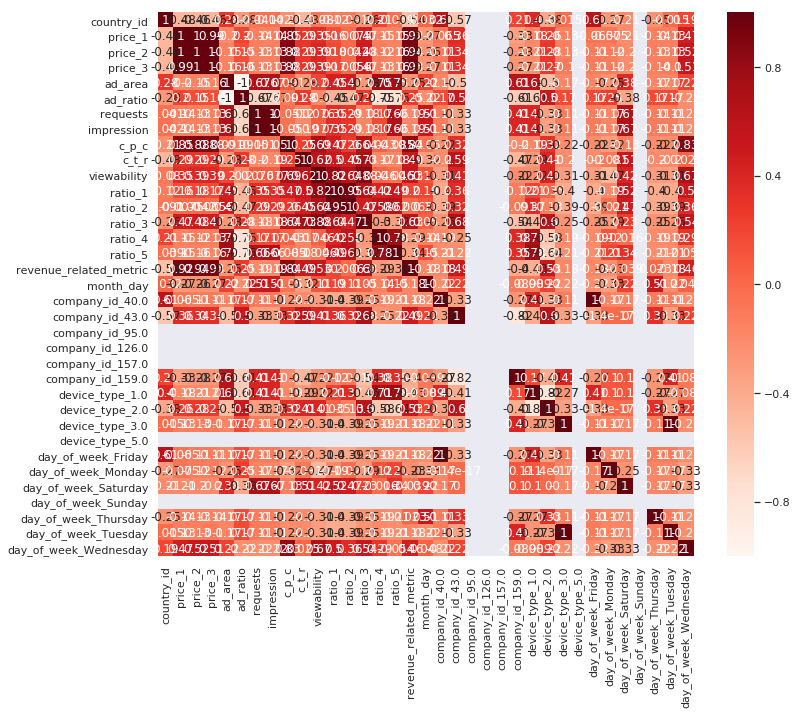

In [55]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes=True)

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data_clean.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [56]:
#Correlation with output variable
cor_target = abs(cor["revenue_related_metric"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features.sort_values()

ad_area                   0.251608
ad_ratio                  0.251608
ratio_4                   0.288149
ratio_5                   0.340453
company_id_159.0          0.395067
device_type_1.0           0.429309
day_of_week_Wednesday     0.460688
c_t_r                     0.493336
company_id_43.0           0.494447
viewability               0.526715
device_type_2.0           0.531403
country_id                0.542868
ratio_3                   0.627412
c_p_c                     0.840007
price_1                   0.920550
price_3                   0.932948
price_2                   0.935045
revenue_related_metric    1.000000
Name: revenue_related_metric, dtype: float64

We have tried two feature selection technique here.Out of which Random Forest Classifier is most suitable for datasets like this and for regression problems we use  RFC.

Also, we could observe that these two methods give the same variables as top features.At this point we are moving further with 10 descriptive features.

##Data Sampling


The training set advertising_train.csv , the test set advertising_test.csv and a sample submission file , advertising_sample_submission.csv in the correct format for reference. Phase 1 of this project focus mainly on the Training dataset analysis, exploration and cleansing. Later on, in phase 2 we utilise training and test datasets to apply suitable machine learning technique for the prediction model.

This dataset contains real-world online advertising data where the target feature is a revenue-related metric and the descriptive features are various advertising metrics and characteristics. Each row represents a website traffic record that comes from a specific country, company, and device type combination. The dataset contains 30 days of training data and 5 days of test data. The training data contains about 215K records and the test data contains about 31K records. .Both data sets consist of 20 descriptive features and one target feature. In this project, we worked on training dataset. In Phase II, we would build the appropriate machine learning algorithm from the data set and evaluate their performance using different data validation techniques.

We have selected the imported features obtained from machine learning and created the subset of the original  data frame using the top 7 features. Also , applying min max scaling to the selected subset for modelling 

In [67]:
data_clean.shape


(10, 35)

In [68]:
d_trainmodel.shape

(214128, 35)

In [0]:
# Scaling selected descrptive features using minmax scaling

# Based on RFI output
Data=d_trainmodel[['c_t_r', 'c_p_c', 'country_id', 'price_2', 'price_1', 'requests','price_3']].astype('float')
from sklearn import preprocessing

#Using  most important features from RFI
X_df=Data.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)
target = d_trainmodel['revenue_related_metric'].values


In [73]:
n_samples = 5000

Data_sample = pd.DataFrame(Data).sample(n=n_samples, random_state=8).values
target_sample = pd.DataFrame(target).sample(n=n_samples, random_state=8).values

print(Data_sample.shape)
print(target_sample.shape)

(5000, 7)
(5000, 1)


In [75]:
#train test split 
#import warnings
#warnings.filterwarnings("ignore")

#import pandas as pd
#import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn import preprocessing

#Data, target = Data_sample, target_sample
# we already have done minmax scaler and fit

D_train, D_test, t_train, t_test = train_test_split(Data_sample, target_sample, test_size=0.3, random_state=999)
print(Data_sample_train.shape)
print(Data_sample_test.shape)

(3500, 7)
(1500, 7)


In [0]:
#Using Gridsearch
from sklearn.model_selection import RepeatedKFold, GridSearchCV
cv_method = RepeatedKFold(n_splits=5, n_repeats=3, random_state=999)

from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


models = {'KNN': KNeighborsRegressor(),
          'DT': tree.DecisionTreeRegressor(),
          'Ridge': Ridge() 
          'Lasso': Lasso()}

models_parameters = {'KNN': {'n_neighbors': [1, 2, 3, 4, 5], 
                             'p': [1, 2, 3]},
                     'DT': {'max_depth': [2, 3, 4], 
                            'min_samples_split': [2, 3, 4, 5]},
                     'Ridge': {'alpha': [0.001, 0.01, 10, 100]}
                     'Lasso': {'alpha': [0.0, 0.02, 0.5, 1.0]}}

In [79]:
fitted_models = {} # this creates an empty dictionary
for m in models: # this will loop over the dictionary keys
    print(f'\nHyperparameter tuning for {m}:')
    gs = GridSearchCV(estimator=models[m], 
                      param_grid=models_parameters[m], 
                      cv=cv_method,
                      verbose=1, 
                      scoring='neg_mean_squared_error')
    gs.fit(D_train, t_train);
    fitted_models[m] = gs
    print(f'Best {m} model: {gs.best_params_}')


Hyperparameter tuning for KNN:
Fitting 15 folds for each of 15 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best KNN model: {'n_neighbors': 5, 'p': 1}

Hyperparameter tuning for DT:
Fitting 15 folds for each of 12 candidates, totalling 180 fits
Best DT model: {'max_depth': 4, 'min_samples_split': 2}

Hyperparameter tuning for Ridge:
Fitting 15 folds for each of 4 candidates, totalling 60 fits
Best Ridge model: {'alpha': 0.01}


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished


In [80]:
from sklearn import metrics
for m in fitted_models:
    t_pred = fitted_models[m].predict(D_test)
    mse = metrics.mean_squared_error(t_test, t_pred)
    print(f'MSE of {m} is: {mse}')

MSE of KNN is: 1.6378634282487359
MSE of DT is: 1.4792101959937602
MSE of Ridge is: 1.839578190402191


In [81]:
# other metrics
from sklearn import metrics
for m in fitted_models:
    t_pred = fitted_models[m].predict(D_test)
    mae = metrics.mean_absolute_error(t_test, t_pred)
    r2 = metrics.r2_score(t_test, t_pred)
    print(f'MAE and r-squared {m} are: {mae}, {r2}')

MAE and r-squared KNN are: 0.6788253767622666, 0.16438411201282765
MAE and r-squared DT are: 0.667435782546027, 0.24532685685116173
MAE and r-squared Ridge are: 0.7555628538401308, 0.06147195389888338



# **Bibliography**

1.	https://www.kaggle.com/c/machine-learning-battle-mlmath2319/data
2.	https://clickwinningcontent.com.au/google-adwords-ctr-cpc-mean/
3.	https://rmit.instructure.com/courses/50786/files/6769418/download?wrap=1
4.  https://docs.python.org/3/
5.  https://rmit.instructure.com/courses/50786/files/7870346/download?wrap=1
6.https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
7.https://towardsdatascience.com/linear-regression-using-python-ce21aa90ade6